In [1]:
# Hidden using cell tags!
# Normally, you dont need to set this variable if you are using
# the default deployment of the backend
import os

os.environ["SNIP_DEPLOYMENT_URL"] = "https://snip:4000"
os.environ["SNIP_ADDITIONAL_REQUEST_ARGS"] = '{"verify": false}'

# Image Snippet Guide

ImageSnips allow to create a snippet that contains an image. Internally the [ImageSnip](snip.snippets.image.ImageSnip)
class uses the PIL library to load and display the image.

## Constructing an ImageSnip

We allow construction of ImageSnip by passing a PIL image object, a matplotlib figure object, an array or a file path to the image. You may use the [ImageSnip.from_pil](snip.snippets.image.ImageSnip.from_pil), [ImageSnip.from_matplotlib](snip.snippets.image.ImageSnip.from_matplotlib), [ImageSnip.from_array](snip.snippets.image.ImageSnip.from_array) or [ImageSnip.from_file](snip.snippets.image.ImageSnip.from_file) respectively.


For instance to create an ImageSnip from a file you can use the following:

In [2]:
from PIL import Image
from snip.snippets import ImageSnip

img = Image.open("test.png")
img_snip = ImageSnip.from_pil(
    img,
)

Similarly you can create an ImageSnip from a matplotlib figure object or an array.

In [7]:
import matplotlib.pyplot as plt
import numpy as np

plt.ioff()

# Create a figure and plot some data
fig, ax = plt.subplots(2, 1, figsize=(5, 10), tight_layout=True)
ax[0].plot([1, 2, 3], [2, 4, 9])
ax[1].bar([1, 2, 3], [2, 4, 9])

# Convert the figure to an image snippet
img_snip_mpl = ImageSnip.from_matplotlib(
    fig,
    savefig_kwargs={"transparent": True},
)

# Create a numpy array and convert it to an image snippet
array = np.random.randint(0, 255, (100, 100, 3), dtype=np.uint8)
img_snip_numpy = ImageSnip.from_array(
    array,
    mode="RGB",
)

## Previewing a Snip

Previews are generated by requesting a render on the snip deployment server. A preview shows the given snippet on an empty page (1400x2000pixels). You may set the width of the returned preview by setting the `SNIP_PREVIEW_IMAGE_WIDTH` environment variable.

To create a preview you need a valid token, otherwise it will not be possible to generated a preview.

Previews can either be generated by calling the [BaseSnip.preview](snip.snippets.base.BaseSnip.preview) method or by if a snippet is on the last line of a cell. 

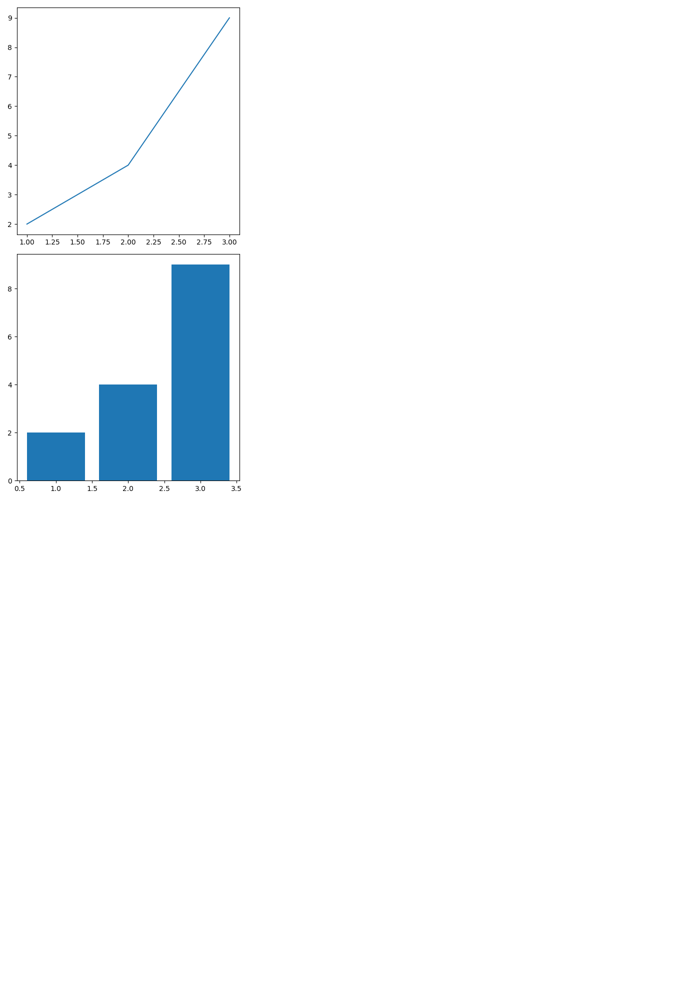

In [4]:
img_snip_mpl  # or img_snip_mpl.preview()

## Editing a Snip

You may also edit a snippet before previewing or uploading it. This can be done by using any of the attributes or methods of the [ImageSnip](snip.snippets.image.ImageSnip) class. For instance you can change the width of the image by using the [width](snip.snippets.image.ImageSnip.width) attribute.

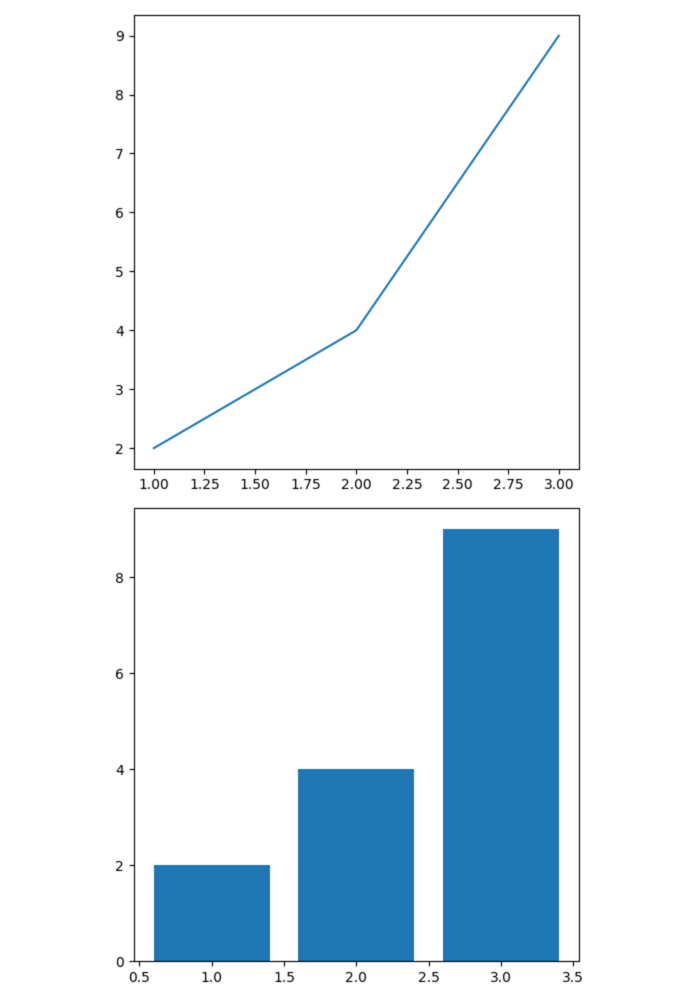

In [5]:
# keeps the aspect ratio by default
img_snip_mpl.width = 1000

# center the image
img_snip_mpl.x = (1400 - img_snip_mpl.width) / 2
img_snip_mpl.y = (2000 - img_snip_mpl.height) / 2

img_snip_mpl

## Uploading

You can upload a snippet by calling the [BaseSnip.upload](snip.snippets.base.BaseSnip.upload) method. This will upload the snippet to the snip deployment server. You can than use the snip editor to place the snippet on a page in your lab book.

Before uploading you need to determine in which book you want to place the snippet. You can do this by setting the `book_id` in the constructor of any snippet. Or you may define the `book_id` in the upload function.

In [ ]:
img_snip_mpl.upload(book_id=1)

In [ ]:
# Alternatively, you can set the book_id attribute
img_snip_mpl.book_id = 1
img_snip_mpl.upload()